In [1]:
import logging
import sys
import os


logger = logging.getLogger('eva;_ipynb')
logger.setLevel(logging.DEBUG)


ch = logging.StreamHandler()
ch.setLevel(logging.INFO)
formatter = logging.Formatter('%(levelname)s - %(asctime)s - %(name)s - %(message)s')
ch.setFormatter(formatter)
logger.addHandler(ch)
logger.debug('--=logging started=--')

In [2]:
IN_COLAB = 'google.colab' in sys.modules
print ('Running in colab:', IN_COLAB)

Running in colab: False


In [3]:
if not IN_COLAB:
  nb_dir = os.path.split(os.getcwd())[0]
  if nb_dir not in sys.path:
      sys.path.append(nb_dir)
 

In [4]:
import analyser.hyperparams
analyser.hyperparams.work_dir


Nemoware Analyser v23.2.7
USING WORKDIR: [/root/artem/work]
 set ENV GPN_WORK_DIR to override
datasets_dir: [/root/artem/work/datasets]
reports_dir: [/root/artem/work/reports]


/root/artem/analyser/analyser/hyperparams.py:15: UserWarning: please set GPN_WORK_DIR environment variable
  warnings.warn('please set GPN_WORK_DIR environment variable')


'/root/artem/work'

# Imports

In [5]:
%matplotlib inline

 
import numpy as np
import pandas as pd

 
from trainsets.retrain_contract_uber_model import UberModelTrainsetManager
from tf_support.super_contract_model import semantic_map_keys_contract



2023-02-16 04:35:41.232120: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


HyperParameters.subsidiary_name_match_min_jaro_similarity 0.9649122807017544


[documents.py:270 -             __init__() ] loading word cases stats model from: /root/artem/analyser/analyser/vocab/word_cases_stats.pickle
[currencies.py:17 -             _env_var() ] Currency-service : define GPN_CURRENCY_USER environment variable! defaulting to None
[currencies.py:17 -             _env_var() ] Currency-service : define GPN_CURRENCY_PASSWORD environment variable! defaulting to None
[currencies.py:17 -             _env_var() ] Currency-service : define GPN_CURRENCY_URL environment variable! defaulting to None
[tools.py:29 -             __init__() ] model_checkpoint_path: /root/artem/analyser/analyser/vocab


In [6]:
from colab_support.renderer import HtmlRenderer
import matplotlib as matplotlib
from IPython.core.display import display, HTML

class DemoRenderer(HtmlRenderer):
  def render_color_text(self, tokens, weights, colormap='coolwarm', print_debug=False, _range=None, separator=' '):
    html = self.to_color_text(tokens, weights, colormap, print_debug, _range, separator=separator)
    display(HTML(html))

  def to_color_text(self, tokens, weights, colormap='coolwarm', print_debug=False, _range=None, separator=' '):
    return super()._to_color_text(tokens, weights, matplotlib, colormap=colormap, _range=_range, separator=separator)

renderer_ = DemoRenderer()


# renderer_.render_color_text(["слово 1", "слово 2"], np.array( [1, 0]), _range=(0,1))

/tmp/ipykernel_3924016/228146364.py:3: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


# Prepare model


In [7]:
from pathlib import Path
work_dir = Path(analyser.hyperparams.work_dir)
# del work_dir
# # print(work_dir)

training_reports_path = Path(analyser.hyperparams.__file__).parent.parent / 'training_reports/'

# Loading data set meta

In [8]:

umtm = UberModelTrainsetManager (work_dir, training_reports_path)
umtm.load_contract_trainset_meta()
stats = umtm.stats
stats['sample_weight']=-1.0
stats['subject_weight']=-1.0
stats

,source,checksum,version,export_date,len,analyze_date,value,value_log1p,value_span,currency,...,subj_len,headers,subject_pos,url,unseen,score,hash,dups,sample_weight,subject_weight
_id,,,,,,,,,,,,,,,,,,,,,
5ec2b8da665f7603e03b1255,db,3187bfac60ea578221c5d9357756c6c1,1.6.5,2023-02-11 23:58:52.944266,5840.0,2020-05-18 17:16:38.114000+00:00,2.523632e+07,17.043795,5674.0,BRL,...,79.0,4.0,1444.0,http://gpn-audit.nemosoft.ru/#/audit/edit/5ec2...,False,6.489089e-01,1.466727e+18,1.0,-1.0,-1.0
5edbc62eda3678279fbcadf3,file,027a7c30f74ff8ffe684378e9883dd8e,2.0.2,2023-02-15 19:40:44.884996,1370.0,2020-07-18 20:24:58.934000+00:00,2.400000e+04,10.085851,747.0,RUB,...,106.0,10.0,NaN,http://gpn-audit.nemosoft.ru/#/audit/edit/5edb...,False,6.552332e-01,7.820601e+18,1.0,-1.0,-1.0
5ded4e284ddc27bcf92dd6ce,file,9a44591c17d2b8f34dc8f1c3600c8c3a,1.11.2,2023-02-15 19:40:41.177191,460.0,2020-06-12 21:09:19.574000+00:00,5.900000e+05,13.287880,150.0,RUB,...,30.0,5.0,NaN,http://gpn-audit.nemosoft.ru/#/audit/edit/5ded...,False,7.597030e-01,6.378618e+18,1.0,-1.0,-1.0
63ce49f8e83d1ee490f3f21c,db,25d924fc09b7291d964f464f9c3ec8c3,23.1.27.1,2023-02-03 16:19:06.576376,8530.0,2023-01-28 09:34:50.691000+00:00,3.000000e+09,21.821878,337.0,RUB,...,53.0,12.0,100.0,http://gpn-audit.nemosoft.ru/#/audit/edit/63ce...,False,1.153584e+00,-8.785895e+18,1.0,-1.0,-1.0
62dfbce15d5a202ba67b842d,db,61cfee32867b371843d1e95a194ea2a6,3.0.0,2023-02-15 19:41:01.685099,5550.0,2022-07-26 13:08:03.309000+00:00,1.000000e+11,25.328436,1505.0,RUB,...,37.0,17.0,395.0,http://gpn-audit.nemosoft.ru/#/audit/edit/62df...,False,1.746836e+00,-5.929322e+18,4.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60890e6294a1f9b4c8a71405,db,5a19ae3f1e7f137fcbea430a082c7abb,2.3.14,2023-01-31 18:37:43.581524,130.0,2021-04-28 10:30:55.292000+00:00,NaN,NaN,NaN,NaN,...,0.0,2.0,NaN,http://gpn-audit.nemosoft.ru/#/audit/edit/6089...,True,1.440000e+08,4.689905e+18,1.0,-1.0,-1.0
5fb278c4d8c9df1ed1236d73,db,8211a8631eb46acc91f6a392e56c6f2a,2.5.3,2023-01-31 18:37:59.053524,150.0,2021-10-27 11:23:17.395000+00:00,NaN,NaN,NaN,NaN,...,0.0,2.0,NaN,http://gpn-audit.nemosoft.ru/#/audit/edit/5fb2...,True,1.440000e+08,6.647221e+16,9.0,-1.0,-1.0
6285f525f098f73e14297f98,db,1209b403e2ff9f0502d1f57d163fefb9,3.0.0,2023-01-31 18:38:00.272988,460.0,2022-05-19 10:50:24.979000+00:00,NaN,NaN,NaN,NaN,...,0.0,2.0,NaN,http://gpn-audit.nemosoft.ru/#/audit/edit/6285...,True,1.440000e+08,-5.572481e+18,3.0,-1.0,-1.0


## look into trainset (take a sample)

In [9]:
from tf_support.super_contract_model import  validate_datapoint

stats['valid'] = True
stats['error'] = ''

for i in stats.index:
  
  try:
    validate_datapoint(str(i), stats)

  except Exception as e:
    logger.error(e)

    stats.at[i, 'valid'] = False
    stats.at[i, 'error'] = str(e)
    
stats

ERROR - 2023-02-16 04:35:50,395 - eva;_ipynb - [Errno 2] No such file or directory: '/root/artem/work/datasets/5fc6452a1d0a1603c7a0c9eb-datapoint-embeddings.npy'
ERROR - 2023-02-16 04:35:53,009 - eva;_ipynb - [Errno 2] No such file or directory: '/root/artem/work/datasets/5fb3d4a078df3635f5441c63-datapoint-embeddings.npy'
ERROR - 2023-02-16 04:35:54,939 - eva;_ipynb - [Errno 2] No such file or directory: '/root/artem/work/datasets/5fbbad2ca2b4551c06107864-datapoint-embeddings.npy'
ERROR - 2023-02-16 04:35:57,024 - eva;_ipynb - [Errno 2] No such file or directory: '/root/artem/work/datasets/638085616a07f3e980b2c0cd-datapoint-embeddings.npy'
ERROR - 2023-02-16 04:35:57,025 - eva;_ipynb - [Errno 2] No such file or directory: '/root/artem/work/datasets/638085ab6a07f3e980b2c700-datapoint-embeddings.npy'
ERROR - 2023-02-16 04:35:57,025 - eva;_ipynb - [Errno 2] No such file or directory: '/root/artem/work/datasets/63c506dae2456d59975e1418-datapoint-embeddings.npy'
ERROR - 2023-02-16 04:35:57,

,source,checksum,version,export_date,len,analyze_date,value,value_log1p,value_span,currency,...,headers,subject_pos,url,unseen,score,hash,dups,sample_weight,subject_weight,error
_id,,,,,,,,,,,,,,,,,,,,,
5ec2b8da665f7603e03b1255,db,3187bfac60ea578221c5d9357756c6c1,1.6.5,2023-02-11 23:58:52.944266,5840.0,2020-05-18 17:16:38.114000+00:00,2.523632e+07,17.043795,5674.0,BRL,...,4.0,1444.0,http://gpn-audit.nemosoft.ru/#/audit/edit/5ec2...,False,6.489089e-01,1.466727e+18,1.0,-1.0,-1.0,None
5edbc62eda3678279fbcadf3,file,027a7c30f74ff8ffe684378e9883dd8e,2.0.2,2023-02-15 19:40:44.884996,1370.0,2020-07-18 20:24:58.934000+00:00,2.400000e+04,10.085851,747.0,RUB,...,10.0,NaN,http://gpn-audit.nemosoft.ru/#/audit/edit/5edb...,False,6.552332e-01,7.820601e+18,1.0,-1.0,-1.0,None
5ded4e284ddc27bcf92dd6ce,file,9a44591c17d2b8f34dc8f1c3600c8c3a,1.11.2,2023-02-15 19:40:41.177191,460.0,2020-06-12 21:09:19.574000+00:00,5.900000e+05,13.287880,150.0,RUB,...,5.0,NaN,http://gpn-audit.nemosoft.ru/#/audit/edit/5ded...,False,7.597030e-01,6.378618e+18,1.0,-1.0,-1.0,None
63ce49f8e83d1ee490f3f21c,db,25d924fc09b7291d964f464f9c3ec8c3,23.1.27.1,2023-02-03 16:19:06.576376,8530.0,2023-01-28 09:34:50.691000+00:00,3.000000e+09,21.821878,337.0,RUB,...,12.0,100.0,http://gpn-audit.nemosoft.ru/#/audit/edit/63ce...,False,1.153584e+00,-8.785895e+18,1.0,-1.0,-1.0,None
62dfbce15d5a202ba67b842d,db,61cfee32867b371843d1e95a194ea2a6,3.0.0,2023-02-15 19:41:01.685099,5550.0,2022-07-26 13:08:03.309000+00:00,1.000000e+11,25.328436,1505.0,RUB,...,17.0,395.0,http://gpn-audit.nemosoft.ru/#/audit/edit/62df...,False,1.746836e+00,-5.929322e+18,4.0,-1.0,-1.0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60890e6294a1f9b4c8a71405,db,5a19ae3f1e7f137fcbea430a082c7abb,2.3.14,2023-01-31 18:37:43.581524,130.0,2021-04-28 10:30:55.292000+00:00,NaN,NaN,NaN,NaN,...,2.0,NaN,http://gpn-audit.nemosoft.ru/#/audit/edit/6089...,True,1.440000e+08,4.689905e+18,1.0,-1.0,-1.0,[Errno 2] No such file or directory: '/root/ar...
5fb278c4d8c9df1ed1236d73,db,8211a8631eb46acc91f6a392e56c6f2a,2.5.3,2023-01-31 18:37:59.053524,150.0,2021-10-27 11:23:17.395000+00:00,NaN,NaN,NaN,NaN,...,2.0,NaN,http://gpn-audit.nemosoft.ru/#/audit/edit/5fb2...,True,1.440000e+08,6.647221e+16,9.0,-1.0,-1.0,[Errno 2] No such file or directory: '/root/ar...
6285f525f098f73e14297f98,db,1209b403e2ff9f0502d1f57d163fefb9,3.0.0,2023-01-31 18:38:00.272988,460.0,2022-05-19 10:50:24.979000+00:00,NaN,NaN,NaN,NaN,...,2.0,NaN,http://gpn-audit.nemosoft.ru/#/audit/edit/6285...,True,1.440000e+08,-5.572481e+18,3.0,-1.0,-1.0,[Errno 2] No such file or directory: '/root/ar...


In [10]:
stats_valid = stats[stats['valid']]
# stats_valid = stats_valid[stats_valid.source=='file']
len(stats_valid)

3086

In [11]:
import json
import re
from bson import json_util

fn = work_dir / 'documents.json'
with open(fn) as file:
    file_data = json.load(file, object_hook=json_util.object_hook)    
    print(f'total docs in {fn} is {len(file_data)}')    
    

total docs in /root/artem/work/documents.json is 622


## validating data set

In [12]:
from pandas import DataFrame


def validate_datapoint(id: str, meta: DataFrame):
  try:
    (emb, tok_f), (sm, subj), (sample_weight, subject_weight) = make_xyw(id, meta)
    if sm.shape[1] != len(semantic_map_keys_contract):
      mxs = f'semantic map shape is {sm.shape[1]}, expected is {len(semantic_map_keys_contract)} source={meta.at[id, "source"]}'
      raise ValueError(mxs)

  except Exception as e:
    raise e
    
# validate_datapoint('5deba9034ddc27bcf92dd383', stats)

In [13]:
from analyser.persistence import DbJsonDoc
from tf_support.super_contract_model import make_xyw

import traceback

docs = {}
errors = 0
for fd in file_data:
    try:
      validate_datapoint(str(fd['_id']), stats)
      docs [fd['_id']] =  DbJsonDoc(fd)
#       print (fd['_id'])
    except KeyError as e:
      errors += 1
      logger.error(f'No key in stats: {str(e)}')
    except Exception as e:
      errors += 1
      
      logger.error(f'{type(e)}, {str(e)}')
      traceback.print_exc()

print('errors count:', errors)
print(f'total docs in {fn} is {len(list(docs.values()))}')   

ERROR - 2023-02-16 04:36:00,470 - eva;_ipynb - No key in stats: '5deba9034ddc27bcf92dd383'
ERROR - 2023-02-16 04:36:00,473 - eva;_ipynb - No key in stats: '5dece9b94ddc27bcf92dd409'
ERROR - 2023-02-16 04:36:00,476 - eva;_ipynb - No key in stats: '5dece9be4ddc27bcf92dd410'
ERROR - 2023-02-16 04:36:00,479 - eva;_ipynb - No key in stats: '5dece9be4ddc27bcf92dd411'
ERROR - 2023-02-16 04:36:00,489 - eva;_ipynb - No key in stats: '5dece9bf4ddc27bcf92dd41b'
ERROR - 2023-02-16 04:36:00,490 - eva;_ipynb - No key in stats: '5dece9bf4ddc27bcf92dd425'
ERROR - 2023-02-16 04:36:00,540 - eva;_ipynb - No key in stats: '5ded06f04ddc27bcf92dd4b0'
ERROR - 2023-02-16 04:36:00,552 - eva;_ipynb - No key in stats: '5ded07034ddc27bcf92dd4d7'
ERROR - 2023-02-16 04:36:00,556 - eva;_ipynb - No key in stats: '5ded07184ddc27bcf92dd4eb'
ERROR - 2023-02-16 04:36:00,559 - eva;_ipynb - No key in stats: '5ded07184ddc27bcf92dd4ed'
ERROR - 2023-02-16 04:36:00,564 - eva;_ipynb - No key in stats: '5ded07184ddc27bcf92dd4fc'

errors count: 79
total docs in /root/artem/work/documents.json is 543


## Get sample doc

In [14]:
_DEBUG = True

if _DEBUG:
    a_doc_from_json = list(docs.values())[20]


print(a_doc_from_json.get_tokens_map_unchaged().text[:230])

Договор №САХ-16/09000/00037/Д.
г. Санкт-Петербург                                              "16" мая 2016 год.
Общество с ограниченной ответственностью «Газпромнефть-Сахалин», именуемое в дальнейшем «Продавец», в лице генеральн


In [15]:
# a_doc_from_json.parse

In [16]:
a_doc_from_json.get_attributes_tree()

{'orgs': [{'type': {'span': [14, 18],
    'span_map': 'words',
    'confidence': 0.993,
    'value': 'Общество с ограниченной ответственностью'},
   'name': {'span': [19, 20],
    'span_map': 'words',
    'confidence': 0.9905,
    'value': 'Газпромнефть-Сахалин'},
   'alias': {'span': [26, 27],
    'span_map': 'words',
    'confidence': 0.987,
    'value': 'Продавец'}},
  {'type': {'span': [47, 51],
    'span_map': 'words',
    'confidence': 0.9765,
    'value': 'Общество с ограниченной ответственностью'},
   'name': {'span': [52, 53],
    'span_map': 'words',
    'confidence': 0.974,
    'value': 'МеталлРесурс'},
   'alias': {'span': [59, 60],
    'span_map': 'words',
    'confidence': 0.9705,
    'value': 'Покупатель'}}],
 'subject': {'span': [203, 246],
  'span_map': 'words',
  'confidence': 0.5159854292869568,
  'value': 'Deal'},
 'number': {'span': [1, 2],
  'span_map': 'words',
  'confidence': 1,
  'value': 'САХ-16/09000/00037/Д'},
 'price': {'span': [1206, 1215],
  'span_map': '

SAMPLE_DOC_ID 5ded004f4ddc27bcf92dd490
semantic map shape is: (3366, 30)


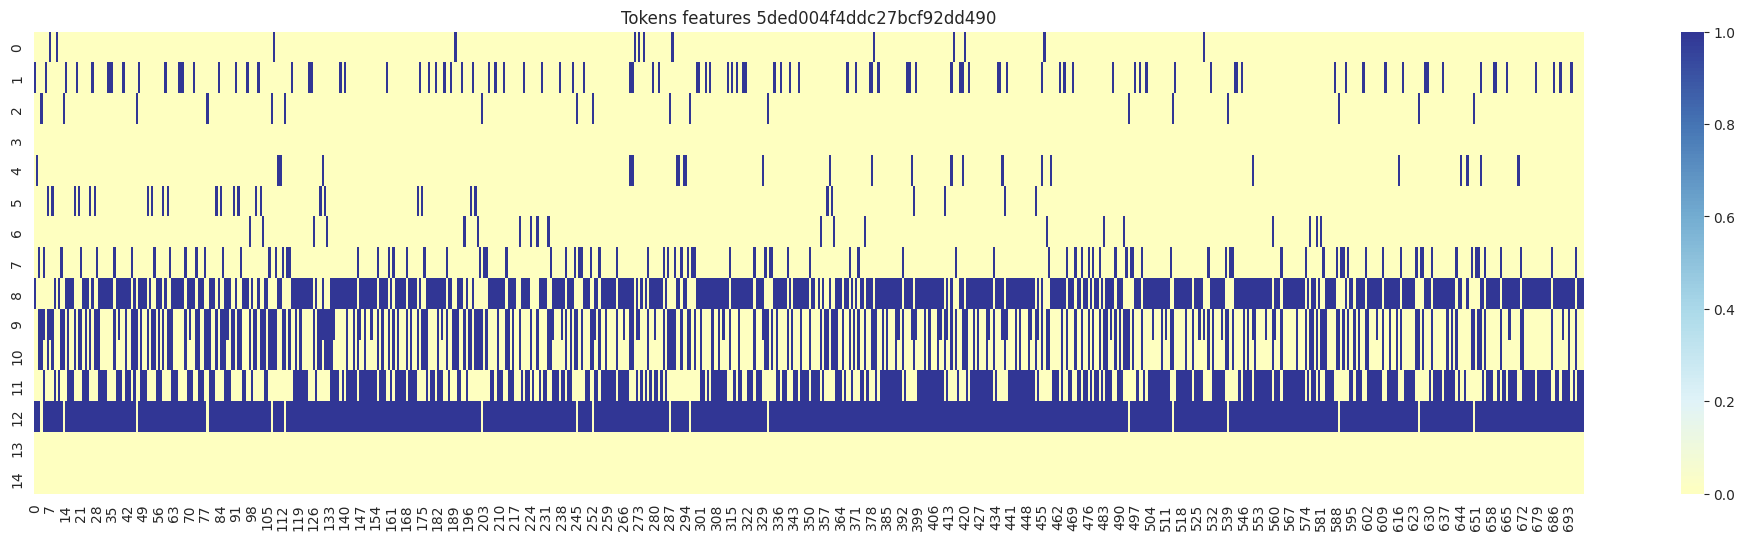

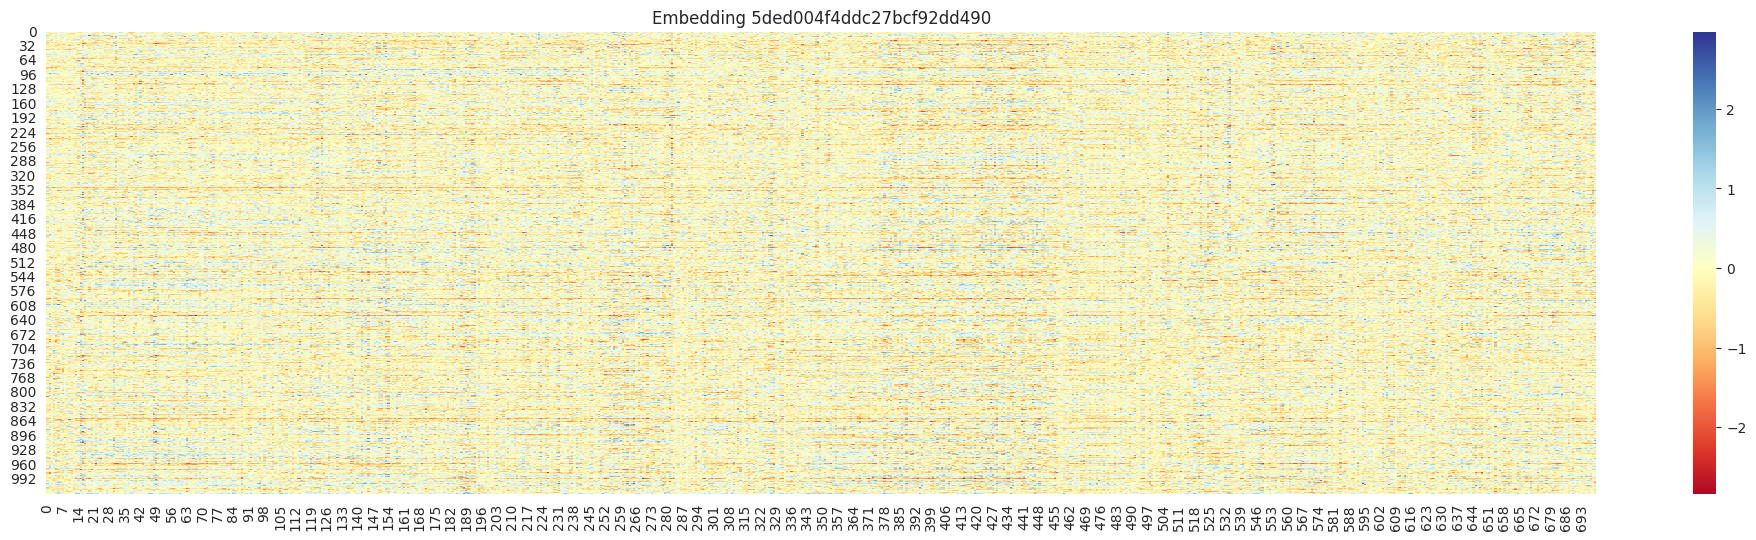

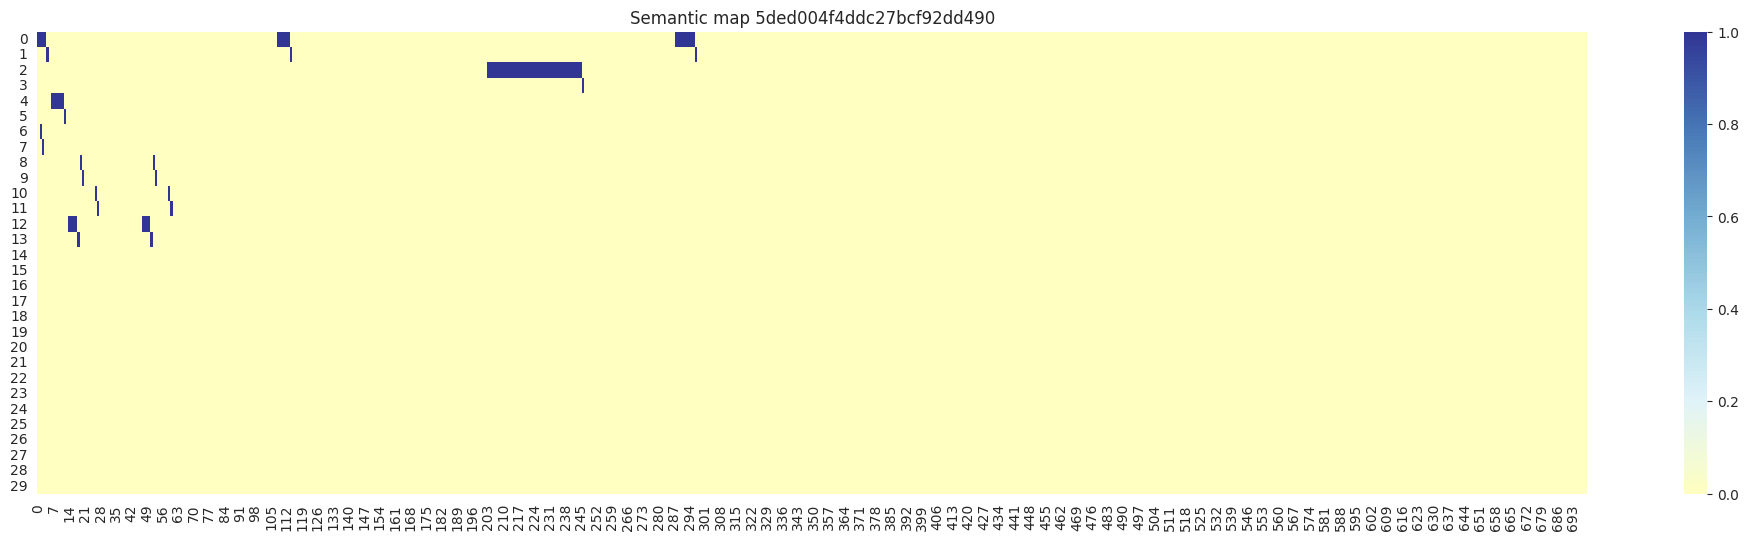

In [17]:
%matplotlib inline
from colab_support.renderer import plot_embedding, plot_cm
from tf_support.super_contract_model import make_xyw

SAMPLE_DOC_ID = str(a_doc_from_json.get_id())# stats_valid.index[0]


# SAMPLE_DOC_ID = '5fdb2145542ce403c92b460c'
# del a_doc_from_json

print('SAMPLE_DOC_ID', SAMPLE_DOC_ID)

(emb, tok_f), (sm, subj), (sample_weight, subject_weight) = make_xyw(SAMPLE_DOC_ID, stats)
 
    
print('semantic map shape is:', sm.shape)
_crop = 700
plot_embedding(tok_f[:_crop], title=f'Tokens features {SAMPLE_DOC_ID}') 
plot_embedding(emb[:_crop], title=f'Embedding {SAMPLE_DOC_ID}') 
plot_embedding(sm[:_crop], title=f'Semantic map {SAMPLE_DOC_ID}')


# Models 🦖

In [ ]:
if 'TEST_FLOW' not in globals():
    TEST_FLOW = False

In [18]:

if 'model_factory_fn' in globals():
    print ('*'*80)
    print('model_factory_fn defined as', model_factory_fn.__name__)
else:
    from tf_support.super_contract_model import make_att_model
    model_factory_fn = make_att_model


see https://mlflow.org/docs/latest/models.html#keras-keras

In [19]:
training_reports_path = Path(analyser.hyperparams.__file__).parent.parent / 'training_reports/'

from tf_support.tools import KerasTrainingContext
from sklearn.model_selection import train_test_split

 
ctx = KerasTrainingContext(umtm.work_dir, session_index=21)
ctx.EVALUATE_ONLY = True
 

    
if 'umodel' in globals() and umodel is not None:
    print ('*'*80)
    print('umodel defined as', umodel.name)
else:
    # weights = Path(analyser.hyperparams.models_path) / f"{model_factory_fn.__name__}.h5"
    weights = training_reports_path / f'{model_factory_fn.__name__}.h5'
    if weights.is_file():
        print (f'LOADING: {model_factory_fn} -- {weights}')

    umodel = ctx.init_model(model_factory_fn, trained=True, trainable=True, weights=weights)
umodel.trainable = False
umodel.summary()

[tools.py:29 -             __init__() ] model_checkpoint_path: /root/artem/work


LOADING: <function make_att_model at 0x7f8c90ec1430> -- /root/artem/analyser/training_reports/make_att_model.h5


2023-02-16 04:36:07.376306: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2023-02-16 04:36:07.873834: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-16 04:36:07.874486: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: A100-PCIE-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-02-16 04:36:07.874510: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2023-02-16 04:36:07.874543: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2023-02-16 04:36:07.874561: I tensorflow/stream_executor/platform/defa

Model: "make_att_model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
token_features (InputLayer)     [(None, None, 15)]   0                                            
__________________________________________________________________________________________________
input_text_emb (InputLayer)     [(None, None, 1024)] 0                                            
__________________________________________________________________________________________________
bn2 (BatchNormalization)        (None, None, 15)     60          token_features[0][0]             
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, None, 1039)   0           input_text_emb[0][0]             
                                                                 bn2[0][0]           

# Evaluate models

2023-02-16 04:36:08.868638: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2023-02-16 04:36:08.885922: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 3699850000 Hz


5ded004f4ddc27bcf92dd490


2023-02-16 04:36:09.356386: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2023-02-16 04:36:09.885652: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11
2023-02-16 04:36:09.885697: I tensorflow/stream_executor/cuda/cuda_blas.cc:1838] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-02-16 04:36:09.899892: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2023-02-16 04:36:09.991084: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8500


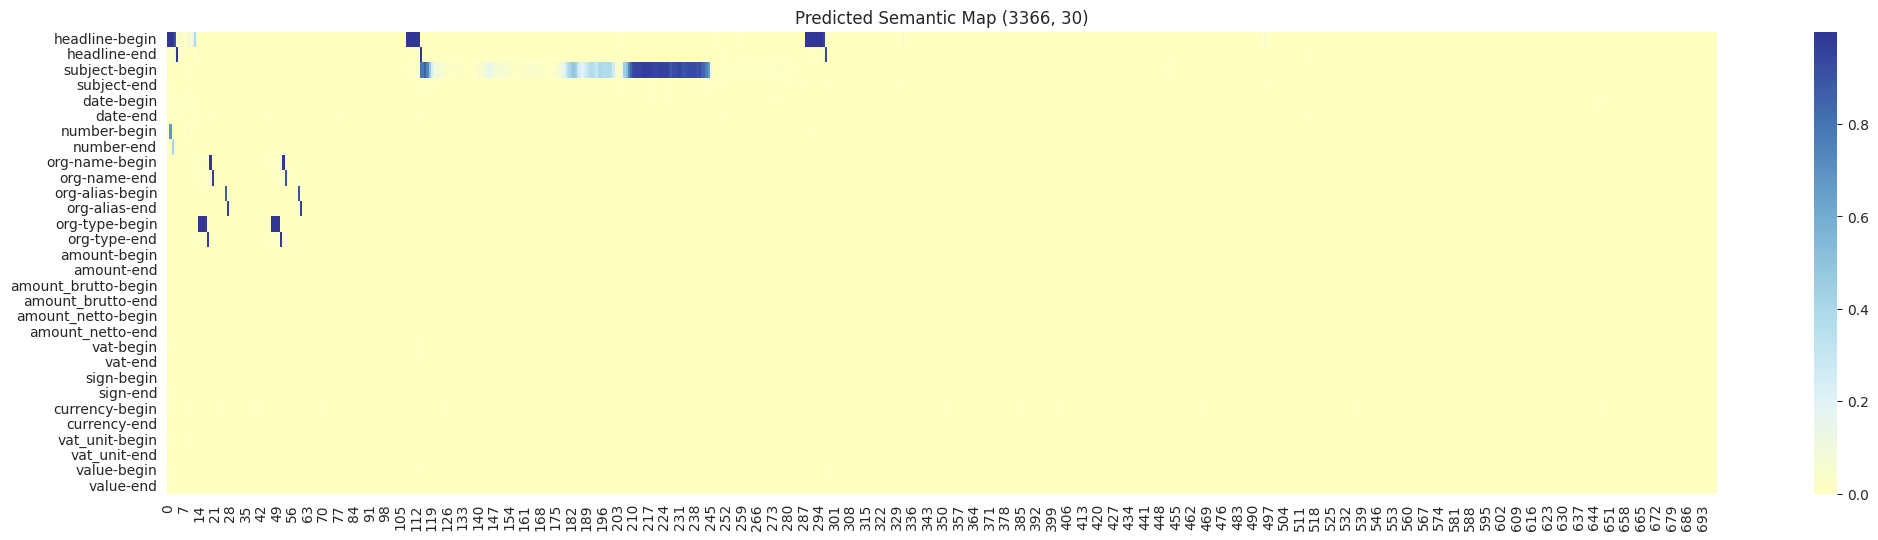

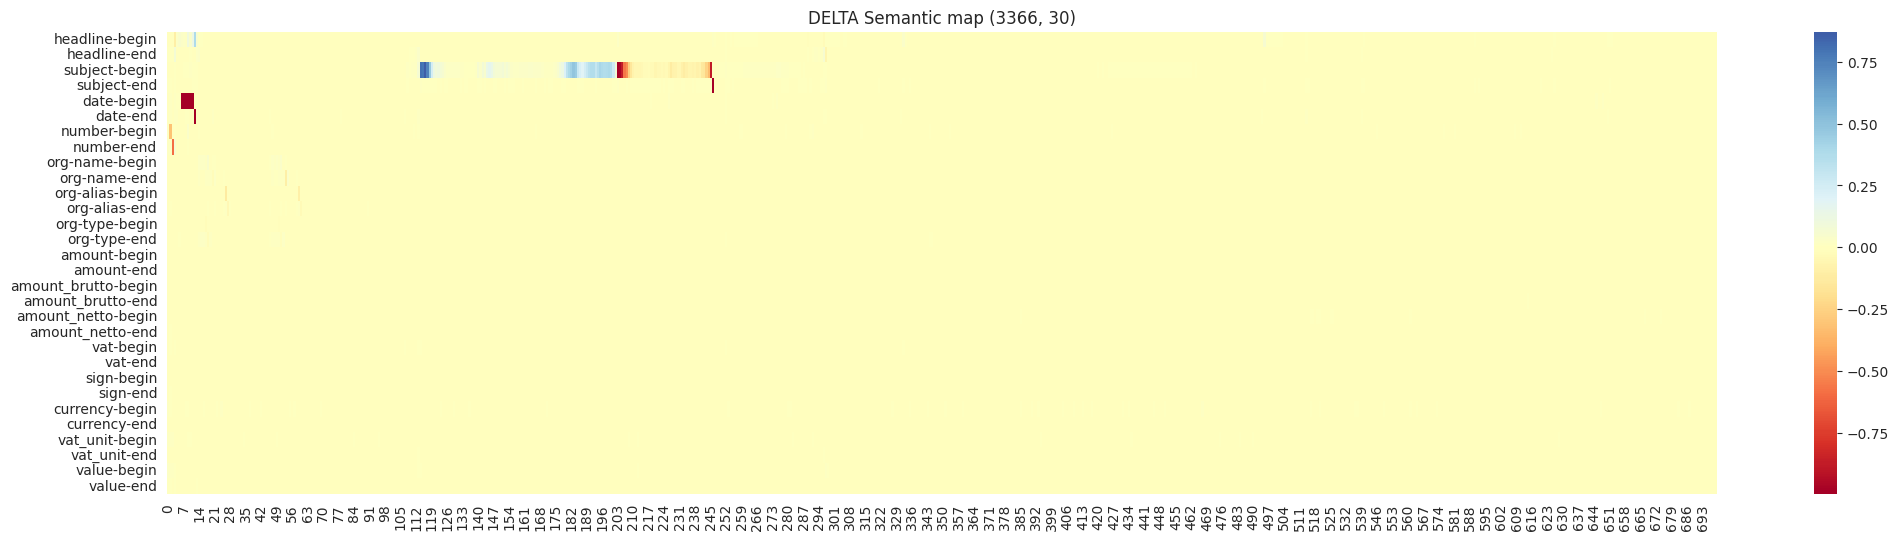

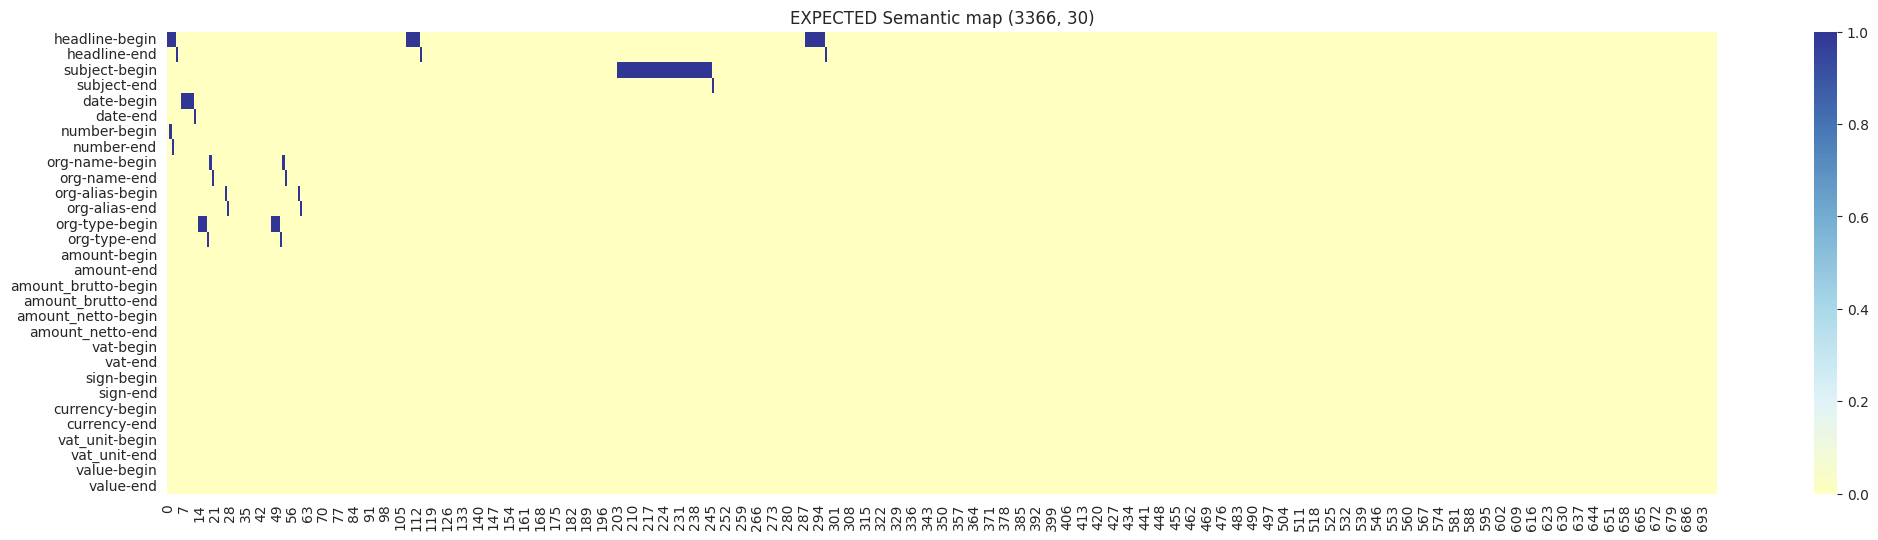

In [20]:
# sample_index = umtm.stats [umtm.stats['value']>0].index[2]
print(SAMPLE_DOC_ID)
prediction = umodel.predict(x=[np.expand_dims(emb, axis=0), np.expand_dims(tok_f, axis=0)], batch_size=1)



# x, y, _ = (emb, tok_f), (sm, subj), (sample_weight, subject_weight)# = umtm.make_xyw(SAMPLE_DOC_ID)

# x, y, _ = umtm.make_xyw(sample_index)

# prediction = umodel.predict(x=[np.expand_dims(x[0], axis=0), np.expand_dims(x[1], axis=0)], batch_size=1)



tagsmap = pd.DataFrame(prediction[0][0], columns=semantic_map_keys_contract)
tagsmap_e = pd.DataFrame(sm, columns=semantic_map_keys_contract)
delta = tagsmap - tagsmap_e 
# .T
plot_embedding(tagsmap[:_crop], f'Predicted Semantic Map {tagsmap.shape}')
plot_embedding(delta[:_crop], title=f'DELTA Semantic map {tagsmap_e.shape}')
plot_embedding(tagsmap_e[:_crop], title=f'EXPECTED Semantic map {tagsmap_e.shape}')

In [21]:
delta.abs().sum().sum()

75.4695613385765

In [22]:


delta.abs().sum().sum() / tagsmap.sum().sum()

0.3429955485153364

In [23]:
av = tagsmap.sum(axis=1) #tagsmap['amount-begin'] + tagsmap['vat-begin'] + tagsmap['number-begin'] + tagsmap['org-name-begin']

# av = tagsmap.sum(axis=1)
renderer_.render_color_text(a_doc_from_json.get_tokens_map_unchaged().tokens[:600], av[:600])

In [24]:
from analyser.documents import TextMap
from analyser.ml_tools import SemanticTag

 

## Getting tag values from inferred semantic map

In [25]:
from analyser.contract_parser import nn_get_tag_values
from analyser.contract_parser import nn_find_org_names, nn_get_subject, nn_get_contract_number, nn_get_contract_date
from analyser.parsing import AuditContext

ac = AuditContext()

#### Orgs

In [26]:
cas = nn_find_org_names(a_doc_from_json.get_tokens_map_unchaged(), tagsmap, ac)
if False:
    
    print(cas[0].name)
    print(cas[0].type)
    print(cas[0].alias)
    print()
    print(cas[1].name)
    print(cas[1].type)
    print(cas[1].alias)

In [27]:
# tag = nn_get_tag_values('org-type',  a_doc_from_json.get_tokens_map_unchaged(), tagsmap, max_tokens=12, threshold=0.3, limit=2)
# for t in tag:
#   print("-"*100)
#   print(t)

In [28]:
# tag = nn_get_tag_values('org-name',  a_doc_from_json.get_tokens_map_unchaged(), tagsmap, max_tokens=12, threshold=0.5, limit=2)
# for t in tag:
#   print("-"*100)
#   print(t)

In [29]:
# tag = nn_get_tag_values('org-alias',  a_doc_from_json.get_tokens_map_unchaged(), tagsmap, max_tokens=4, threshold=0.2, limit=2)


# for t in tag:
#   print("-"*100)
#   print(t)

#### Date/number

In [30]:
# tag = nn_get_tag_values('date',  a_doc_from_json.get_tokens_map_unchaged(), tagsmap, max_tokens=6, threshold=0.3, limit=1, return_single=True)
# print(tag)

In [31]:
# tag = nn_get_tag_values('number',  a_doc_from_json.get_tokens_map_unchaged(), tagsmap, max_tokens=5, threshold=0.3, limit=1, return_single=True)
# print(tag)

In [32]:
date_tag = nn_get_contract_number(a_doc_from_json.get_tokens_map_unchaged(), tagsmap) 
number_tag = nn_get_contract_date(a_doc_from_json.get_tokens_map_unchaged(), tagsmap)
print( date_tag)
print( number_tag )

SemanticTag: number [1, 2] САХ-16/09000/00037/Д 0.6841347217559814
None


#### Amount

In [33]:
textmap = a_doc_from_json.get_tokens_map_unchaged()

In [34]:
from pandas import DataFrame
from analyser.schemas import ContractPrice, merge_spans
from analyser.legal_docs import find_value_sign
from analyser.transaction_values import ValueSpansFinder
from analyser.text_tools import to_float
from analyser.contract_parser import nn_find_contract_value

#---
cps = nn_find_contract_value(textmap, tagsmap)
if cps:
  print(str(cps[0].get_span()))
  for k in cps[0].list_children():
    print(str(k))

  print()
  print()

  print('brutto', str(cps[0].amount_brutto))
  print('netto', str(cps[0].amount_netto))
  print('amount', str(cps[0].amount))
  print('vat', str(cps[0].vat))
else:
  print('nothing found')

(1206, 1216)
None
SemanticTag: currency (1215, 1216) RUB 0.9153504371643066
SemanticTag: sign (1206, 1209) -1 0.48255783319473267
SemanticTag: amount (1209, 1210) 350000.0 1.0
None
None
None


brutto None
netto SemanticTag: amount (1209, 1210) 350000.0 1.0
amount None
vat None


In [35]:
thresholds = dict(tagsmap.max()*.8)
thresholds

{'headline-begin': 0.7999999,
 'headline-end': 0.79999703,
 'subject-begin': 0.7802051,
 'subject-end': 0.011198615,
 'date-begin': 0.011400103,
 'date-end': 0.011693497,
 'number-begin': 0.5473078,
 'number-end': 0.32460198,
 'org-name-begin': 0.7963683,
 'org-name-end': 0.7793028,
 'org-alias-begin': 0.7217714,
 'org-alias-end': 0.7704015,
 'org-type-begin': 0.79990065,
 'org-type-end': 0.7881904,
 'amount-begin': 0.7660293,
 'amount-end': 0.6236746,
 'amount_brutto-begin': 0.042787176,
 'amount_brutto-end': 0.011400702,
 'amount_netto-begin': 0.02611132,
 'amount_netto-end': 0.16547862,
 'vat-begin': 0.036309507,
 'vat-end': 0.028773466,
 'sign-begin': 0.38604626,
 'sign-end': 0.0077954032,
 'currency-begin': 0.7322804,
 'currency-end': 0.776246,
 'vat_unit-begin': 0.011387501,
 'vat_unit-end': 0.006167072,
 'value-begin': 0.7898632,
 'value-end': 0.25623417}

In [36]:
subject_tag = nn_get_tag_values('subject',  a_doc_from_json.get_tokens_map_unchaged(), tagsmap, max_tokens=200, threshold=0.02, limit=1, return_single=True)

print(subject_tag)

SemanticTag: subject (209, 243) и произвести оплату Лома, в соответствии с ГОСТами 2787-75 (для Лома черных металлов) и/или 1639-2009 (для Лома цветных металлов), на условиях настоящего Договора по ценам, указанным в 0.9324449300765991


### Draw tags TODO:

In [37]:
import matplotlib.pyplot as plt
tags_hl = np.zeros(len(textmap))

# def hl(tag):
#   try:
#     tags_hl [ tag.span[0]:tag.span[1]] +=1
#   except:
#     pass
  

# if cps:
#   hl(cps[0].amount_brutto)
#   hl(cps[0].amount_netto)
#   hl(cps[0].amount)
#   hl(cps[0].vat)
#   hl(cps[0].sign)
#   hl(cps[0].currency)
#   hl(cps[0])


# if cas and len(cas)>0:
#     hl(cas[0].name)
#     hl(cas[0].type)
#     hl(cas[0].alias)

    
# if cas and len(cas)>1:
#     hl(cas[1].name)
#     hl(cas[1].type)
#     hl(cas[1].alias)

# hl(number_tag)
# hl(date_tag)


# hl(subject_tag)

# renderer_.render_color_text(a_doc_from_json.get_tokens_map_unchaged().tokens[:160], tags_hl[:160])

In [38]:
ev = umtm.stats.copy()
tags = pd.DataFrame()
errors_report = pd.DataFrame()


In [39]:
userdocs = umtm.stats[umtm.stats.unseen==False]
userdocs = userdocs[userdocs.source=='db']
userdocs = userdocs[userdocs.score < 50000]
userdocs

,source,checksum,version,export_date,len,analyze_date,value,value_log1p,value_span,currency,...,headers,subject_pos,url,unseen,score,hash,dups,sample_weight,subject_weight,error
_id,,,,,,,,,,,,,,,,,,,,,
5ec2b8da665f7603e03b1255,db,3187bfac60ea578221c5d9357756c6c1,1.6.5,2023-02-11 23:58:52.944266,5840.0,2020-05-18 17:16:38.114000+00:00,2.523632e+07,17.043795,5674.0,BRL,...,4.0,1444.0,http://gpn-audit.nemosoft.ru/#/audit/edit/5ec2...,False,0.648909,1.466727e+18,1.0,-1.0,-1.0,None
63ce49f8e83d1ee490f3f21c,db,25d924fc09b7291d964f464f9c3ec8c3,23.1.27.1,2023-02-03 16:19:06.576376,8530.0,2023-01-28 09:34:50.691000+00:00,3.000000e+09,21.821878,337.0,RUB,...,12.0,100.0,http://gpn-audit.nemosoft.ru/#/audit/edit/63ce...,False,1.153584,-8.785895e+18,1.0,-1.0,-1.0,None
62dfbce15d5a202ba67b842d,db,61cfee32867b371843d1e95a194ea2a6,3.0.0,2023-02-15 19:41:01.685099,5550.0,2022-07-26 13:08:03.309000+00:00,1.000000e+11,25.328436,1505.0,RUB,...,17.0,395.0,http://gpn-audit.nemosoft.ru/#/audit/edit/62df...,False,1.746836,-5.929322e+18,4.0,-1.0,-1.0,None
63908ca4a1bded13e629f2eb,db,3bc04887446d02692e886db2545bba61,22.12.7,2023-01-31 18:38:08.500901,13410.0,2022-12-08 13:59:29.898000+00:00,2.000000e+10,23.718998,2572.0,RUB,...,21.0,2222.0,http://gpn-audit.nemosoft.ru/#/audit/edit/6390...,False,1.805167,2.640686e+18,1.0,-1.0,-1.0,None
63908ca3a1bded13e629f2dc,db,778e9604f0dfb6ed01dc05cce32ab2c2,22.12.7,2023-02-15 19:41:01.882512,4890.0,2022-12-08 21:48:02.600000+00:00,7.000000e+09,22.669176,399.0,NaN,...,11.0,148.0,http://gpn-audit.nemosoft.ru/#/audit/edit/6390...,False,1.971416,-4.979557e+18,3.0,-1.0,-1.0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5fbbe466a2b4551c06107adc,db,ed14fbd88b6697468626b58c4e93f8d4,2.0.5,2023-01-31 18:36:03.323533,2240.0,2020-11-24 08:53:55.557000+00:00,NaN,NaN,NaN,NaN,...,12.0,111.0,http://gpn-audit.nemosoft.ru/#/audit/edit/5fbb...,False,48278.502272,-8.011134e+18,7.0,-1.0,-1.0,None
5fdb2142542ce403c92b4599,db,20708bd0e07776da9db146072650ecc7,2.0.5,2023-01-31 18:36:05.247064,2910.0,2020-12-18 12:02:39.911000+00:00,NaN,NaN,NaN,NaN,...,14.0,107.0,http://gpn-audit.nemosoft.ru/#/audit/edit/5fdb...,False,48278.502272,7.427925e+18,1.0,-1.0,-1.0,None
5fdb2144542ce403c92b45e7,db,7ff28583977151bd5bdbfdb3118d7d65,2.0.5,2023-01-31 18:36:05.451905,5380.0,2020-12-18 17:32:42.470000+00:00,NaN,NaN,NaN,NaN,...,35.0,115.0,http://gpn-audit.nemosoft.ru/#/audit/edit/5fdb...,False,48278.502272,8.032404e+18,1.0,-1.0,-1.0,None


In [40]:
from tf_support.super_contract_model import t_semantic_map_keys_price, semantic_map_keys, t_semantic_map_keys_common, t_semantic_map_keys_org
semantic_keys_numeric = ['amount', 'amount_brutto', 'amount_netto']

In [41]:

for v in semantic_map_keys:
    for s in ['_expected', '_predicted']:
        userdocs[f'{v}{s}'] = ''
        userdocs[f'{v}{s}'] = userdocs[f'{v}{s}'].astype(str)
        
for v in semantic_keys_numeric:
    for s in ['_expected', '_predicted']:
        userdocs[f'{v}{s}'] = np.NaN
        userdocs[f'{v}{s}'] = userdocs[f'{v}{s}'].astype(float)
        


In [42]:
org_keys=['name', 'alias', 'type']
org_numbered_keys=[ f'org-1-{v}' for v in org_keys]
org_numbered_keys+=[ f'org-2-{v}' for v in org_keys]
org_numbered_keys

['org-1-name',
 'org-1-alias',
 'org-1-type',
 'org-2-name',
 'org-2-alias',
 'org-2-type']

In [44]:
from tf_support.tf_subject_model import decode_subj_prediction
from integration.db import get_doc_by_id
from bson import ObjectId

batch_size = 96
maxlen=128*12

 
 
def load_doc_as_table_row(_id, df, col_suffix='_expected'):
    doc = get_doc_by_id(ObjectId(_id))
    if doc is None:
        print (f'{_id} not found in db')
        return
    
    jd = DbJsonDoc(doc)
#     print(jd.get_attribute_value('number'))
    
#     df.at[ _id, f'analyze_timestamp{col_suffix}']=jd.analysis['analyze_timestamp']
    
    tree = jd.get_attributes_tree()
    df.at[ _id, f'number{col_suffix}']=jd.get_attribute_value('number')
    df.at[ _id, f'date{col_suffix}']=jd.get_attribute_value('date')
    
    df.at[ _id, f'subject{col_suffix}']=jd.get_attribute_value('subject')
    
    orgs = tree.get('orgs', [])
#     for i, o in enumerate(orgs):
    if len(orgs)>0:
        o1=orgs[0]
    else:
        o1={}
        
    if len(orgs)>1:
        o2=orgs[1]
    else:
        o2={}
        
    for part in org_keys:
        v1 = o1.get(part, {}).get('value', "").lower()
        v2 = o2.get(part, {}).get('value', "").lower()
        vv=sorted([v1,v2])
        df.at[ _id, f'org-1-{part}{col_suffix}'] = vv[1]
        df.at[ _id, f'org-2-{part}{col_suffix}'] = vv[0]

    
    for v in t_semantic_map_keys_price:
        df.at[ _id, f'{v}{col_suffix}'] =  tree.get('price', {}).get(v, {}).get('value')

    df.at[ _id, f'analysis.version{col_suffix}'] = jd.analysis['version']
    return jd
    
    
    

    
def interpret_prediction(_id, tagsmap, df):
    col_suffix="_predicted"
    
    doc = load_doc_as_table_row(_id, df)
    if doc is None: 
        return
    
    #---
    orgs = nn_find_org_names(doc.get_tokens_map_unchaged(), tagsmap, ac)
    if len(orgs)>0:
        o1 = orgs[0]
    else:
        o1={}
        
    if len(orgs)>1:
        o2 = orgs[1]
    else:
        o2={}
        
    for part in ['name', 'alias', 'type']:
        part_tag1 = getattr(o1, part, {})
        part_tag2 = getattr(o2, part, {})
        
        v1 = getattr(part_tag1, 'value', '').lower()
        v2 = getattr(part_tag2, 'value', '').lower()
#         vv= [v1,v2]
        vv=sorted([v1,v2])
        df.at[ _id, f'org-1-{part}{col_suffix}'] = vv[1] 
        df.at[ _id, f'org-2-{part}{col_suffix}'] = vv[0] 
 
    #PRICE
    cps = nn_find_contract_value(doc.get_tokens_map_unchaged(), tagsmap)
    if cps:
        cps=cps[0]
        for v in t_semantic_map_keys_price:
            part = getattr(cps, v)
            if part:
                df.at[ _id, f'{v}{col_suffix}'] = part.value
                 
# 
    number_tag = nn_get_contract_number(doc.get_tokens_map_unchaged(), tagsmap)
    date_tag =   nn_get_contract_date  (doc.get_tokens_map_unchaged(), tagsmap) 
    
    
    
    if number_tag:
        df.at[ _id, f'number{col_suffix}'] = str(number_tag.value)
    else:
        df.at[ _id, f'number{col_suffix}'] = ''
        
        
    if date_tag:
        df.at[ _id, f'date{col_suffix}'] = str(date_tag.value)
    else:
        df.at[ _id, f'date{col_suffix}'] = ''
 

validation_set = userdocs
if TEST_FLOW:
    validation_set = userdocs[0:20]

for i in range(0, len(validation_set), batch_size):
    batch = userdocs[i:i+batch_size]
    actual_batch_size=len(batch)
    print('actual_batch_size', actual_batch_size)
    batch_input_emb=[]
    batch_input_token_f=[]
    for _id in batch.index.values:
 
        dp = make_xyw(_id, userdocs)
        dp = umtm.trim_maxlen( dp, 0, maxlen  )
        (emb, tok_f), (sm, subj), (sample_weight, subject_weight) = dp

        batch_input_emb.append(emb)
        batch_input_token_f.append(tok_f)
        
        expected_subj =  decode_subj_prediction(subj)[0]
        userdocs.at[_id, 'subject_expected'] = expected_subj.name
 
        # weights_subj.append(subject_weight)

    del _id
    del dp

    
    
    dps =  [np.array(batch_input_emb), np.array(batch_input_token_f)]
 
    
    predictions = umodel.predict(x=dps, batch_size=actual_batch_size)
    del batch_input_emb
    del batch_input_token_f
#     print ('len(predictions)', len(predictions))
    
    p_tags = predictions[0]
    p_subj = predictions[1]
    for k,_id in enumerate(batch.index.values):
#     for k in range(0, len(p_tags)):
#         print (k, p_tags.shape, p_subj.shape)
                   
        tagsmap = pd.DataFrame(p_tags[k], columns=semantic_map_keys_contract)
        interpret_prediction(_id, tagsmap, userdocs)
        
        subj_1hot = p_subj[k]

#         expected =  decode_subj_prediction(subj[k])
        predicted = decode_subj_prediction(subj_1hot)[0]
        userdocs.at[_id, 'subject_predicted'] = predicted.name
        
        
#         print(predicted)
            
#         print(_id, trim_dp(x[0]).shape)

# userdocs[['org-1-name_expected','subject_expected','subject_predicted','date_expected','date_predicted', 'number_expected','number_predicted']].head(30)
userdocs[
  ['org-1-type_expected', 'org-1-type_predicted', 'org-1-name_expected', 'org-1-name_predicted', 'org-1-alias_expected', 'org-1-alias_predicted', 
   'org-2-type_expected', 'org-2-type_predicted', 'org-2-name_expected', 'org-2-name_predicted', 'org-2-alias_expected', 'org-2-alias_predicted', 
   'subject_expected', 'subject_predicted', 'date_expected',
   'date_predicted', 'number_expected', 'number_predicted']].head(30)




actual_batch_size 96


[contract_parser.py:412 - nn_find_contract_value() ] cannot unpack non-iterable NoneType object
[contract_parser.py:412 - nn_find_contract_value() ] cannot unpack non-iterable NoneType object
[contract_parser.py:412 - nn_find_contract_value() ] cannot unpack non-iterable NoneType object
[contract_parser.py:412 - nn_find_contract_value() ] cannot unpack non-iterable NoneType object
[contract_parser.py:412 - nn_find_contract_value() ] cannot unpack non-iterable NoneType object
[contract_parser.py:412 - nn_find_contract_value() ] cannot unpack non-iterable NoneType object
[contract_parser.py:412 - nn_find_contract_value() ] cannot unpack non-iterable NoneType object


actual_batch_size 96


[contract_parser.py:412 - nn_find_contract_value() ] cannot unpack non-iterable NoneType object
[contract_parser.py:412 - nn_find_contract_value() ] cannot unpack non-iterable NoneType object


actual_batch_size 96
637f2826fe09513dc6b2bfc0 not found in db
637f2826fe09513dc6b2bfbf not found in db
actual_batch_size 96


[contract_parser.py:412 - nn_find_contract_value() ] cannot unpack non-iterable NoneType object
[contract_parser.py:412 - nn_find_contract_value() ] cannot unpack non-iterable NoneType object
[contract_parser.py:412 - nn_find_contract_value() ] cannot unpack non-iterable NoneType object


637f725ec15a83c52bb2bfc1 not found in db


[contract_parser.py:412 - nn_find_contract_value() ] cannot unpack non-iterable NoneType object
[contract_parser.py:412 - nn_find_contract_value() ] cannot unpack non-iterable NoneType object
[contract_parser.py:412 - nn_find_contract_value() ] cannot unpack non-iterable NoneType object
[contract_parser.py:412 - nn_find_contract_value() ] cannot unpack non-iterable NoneType object
[contract_parser.py:412 - nn_find_contract_value() ] cannot unpack non-iterable NoneType object
[contract_parser.py:412 - nn_find_contract_value() ] cannot unpack non-iterable NoneType object


actual_batch_size 96


[contract_parser.py:412 - nn_find_contract_value() ] cannot unpack non-iterable NoneType object
[contract_parser.py:412 - nn_find_contract_value() ] cannot unpack non-iterable NoneType object
[contract_parser.py:412 - nn_find_contract_value() ] cannot unpack non-iterable NoneType object


actual_batch_size 96


[contract_parser.py:412 - nn_find_contract_value() ] cannot unpack non-iterable NoneType object
[contract_parser.py:412 - nn_find_contract_value() ] cannot unpack non-iterable NoneType object


actual_batch_size 96


[contract_parser.py:412 - nn_find_contract_value() ] cannot unpack non-iterable NoneType object
[contract_parser.py:412 - nn_find_contract_value() ] cannot unpack non-iterable NoneType object
[contract_parser.py:412 - nn_find_contract_value() ] cannot unpack non-iterable NoneType object
[contract_parser.py:412 - nn_find_contract_value() ] cannot unpack non-iterable NoneType object
[contract_parser.py:412 - nn_find_contract_value() ] cannot unpack non-iterable NoneType object


actual_batch_size 96
actual_batch_size 68


,org-1-type_expected,org-1-type_predicted,org-1-name_expected,org-1-name_predicted,org-1-alias_expected,org-1-alias_predicted,org-2-type_expected,org-2-type_predicted,org-2-name_expected,org-2-name_predicted,org-2-alias_expected,org-2-alias_predicted,subject_expected,subject_predicted,date_expected,date_predicted,number_expected,number_predicted
_id,,,,,,,,,,,,,,,,,,
5ec2b8da665f7603e03b1255,общество с ограниченной ответственностью,с ограниченной,газпромнефть научно-технический центр,газпромнефть нтц,гпн,гпн,компания,компания,sun,,sun,,Service,Service,None,,B1671779,B1671779
63ce49f8e83d1ee490f3f21c,общество с ограниченной ответственностью,общество с ограниченной ответственностью,газпромнефть-каталитические системы,газпромнефть-каталитические системы,приказодатель,приказодатель,акционерное общество,акционерное общество,газпромбанк,,банк,банк,Loans,Loans,None,,IMP/2019/116,IMP/2019/116
62dfbce15d5a202ba67b842d,публичное акционерное общество,публичное акционерное общество,ромашка,ромашка,эмитент,организатор,общество с ограниченной ответственностью,общество с ограниченной ответственностью,газпром нефть,газпром нефть,организатор,,SecuritiesTransactions,SecuritiesTransactions,2021-07-25 00:00:00,,1234,1234
63908ca4a1bded13e629f2eb,публичное акционерное общество,публичное акционерное общество,газпром нефть,газпром нефть,принципал,принципал,публичное акционерное общество,акционерное общество,банк втб,,гарант,гарант,BankGuarantees,BankGuarantees,None,,ГСГ 19/MSHD/0085,ГСГ 19/MSHD/0085
63908ca3a1bded13e629f2dc,публичное акционерное общество,публичное акционерное общество,сбербанк россии,сбербанк россии,поручитель,поручитель,публичное акционерное общество,публичное акционерное общество,газпром нефть,газпром нефть,банк,банк,BankGuarantees,Charity,None,,None,
5fbf75af5d05d73d0295fa99,общество с ограниченной ответственностью,общество с ограниченной ответственностью,газпромнефть-заполярье,газпромнефть-заполярье,субарендодатель,субарендодатель,общество с ограниченной ответственностью,общество с ограниченной ответственностью,газпром добыча оренбург,газпром добыча оренбург,субарендатор,субарендатор,Renting,Renting,2020-08-13 00:00:00,,None,
5ec2b8da665f7603e03b127e,общество с ограниченной ответственностью,общество с ограниченной ответственностью,газпромнефть марин бункер,газпромнефть марин бункер,принципал,принципал,акционерное общество,,газпромбанк,газпромбанк,гарант,гарант,BankGuarantees,BankGuarantees,None,,1516-054-810Г,
636dfd1473925c8dae26f910,пао,,газпромнефть-снабжение,,владелец / принципал,,ооо,,газпром нефть,,агент,,AgencyContract,AgencyContract,None,,None,
636d031e73925c8dae26f90e,пао,публичное акционерное общество,газпромнефть-снабжение,газпромнефть-снабжение,владелец / принципал,владелец,ооо,общество с ограниченной ответственностью,газпром нефть,газпром нефть,агент,агент,AgencyContract,AgencyContract,None,,None,


In [45]:


# userdocs['amount_expected']=userdocs['amount_expected'].replace('',np.NaN).astype(float)
# userdocs['amount_predicted']=userdocs['amount_predicted'].replace('',np.NaN).astype(float)

# userdocs['amount_brutto_predicted'].replace('',np.NaN).astype(float)
# userdocs['amount_brutto_expected'].replace('',np.NaN).astype(float)

columns = []
for v in semantic_keys_numeric:
    for s in ['_expected', '_predicted' ]:
        col = f'{v}{s}'
        userdocs[col] = userdocs[col].replace('',np.NaN).replace(np.NaN, -1).astype(int)
        columns.append(col)
userdocs[columns]

,amount_expected,amount_predicted,amount_brutto_expected,amount_brutto_predicted,amount_netto_expected,amount_netto_predicted
_id,,,,,,
5ec2b8da665f7603e03b1255,-1,-1,-1,-1,25236322,-1
63ce49f8e83d1ee490f3f21c,-1,-1,-1,-1,3000000000,3000000000
62dfbce15d5a202ba67b842d,-1,-1,-1,-1,100000000000,100000000000
63908ca4a1bded13e629f2eb,20000000000,-1,-1,-1,-1,-1
63908ca3a1bded13e629f2dc,7000000000,7000000000,-1,-1,-1,-1
...,...,...,...,...,...,...
5fbbe466a2b4551c06107adc,-1,-1,-1,-1,-1,-1
5fdb2142542ce403c92b4599,-1,-1,-1,-1,-1,-1
5fdb2144542ce403c92b45e7,-1,-1,-1,-1,-1,-1


In [46]:
userdocs=userdocs.replace('None', '')
userdocs=userdocs.replace('none', '')
userdocs=userdocs.replace('nan', '')

userdocs.date_expected = userdocs.date_expected.replace(np.NaN, '')
userdocs.date_predicted = userdocs.date_predicted.replace(np.NaN, '')

userdocs.number_expected = userdocs.number_expected.replace(np.NaN, '')
userdocs.number_predicted = userdocs.number_predicted.replace(np.NaN, '')


userdocs.vat_unit_expected = userdocs.vat_unit_expected.replace(np.NaN, '')
userdocs.vat_unit_predicted = userdocs.vat_unit_predicted.replace(np.NaN, '')

userdocs.vat_expected = userdocs.vat_expected.replace(np.NaN, '')
userdocs.vat_predicted = userdocs.vat_predicted.replace(np.NaN, '')

userdocs.sign_expected = userdocs.sign_expected.replace(np.NaN, '')
userdocs.sign_predicted = userdocs.sign_predicted.replace(np.NaN, '')

userdocs.currency_expected = userdocs.currency_expected.replace(np.NaN, '')
userdocs.currency_predicted = userdocs.currency_predicted.replace(np.NaN, '')

In [47]:
def select_wrong(userdocs, key):
    s= userdocs[userdocs[f'{key}_expected']!=userdocs[f'{key}_predicted']][[f'{key}_expected', f'{key}_predicted']]
    p=float(len(s)) / len(userdocs)
#     print(len(s), p)
    return s,p

# Tags report

In [48]:

import mlflow

 
userdocs['number_of_errors']=0
report = pd.DataFrame()

for k in t_semantic_map_keys_price + org_numbered_keys+t_semantic_map_keys_common:
    s, p = select_wrong(userdocs, k)
    for _id, _ in s.iterrows():
       userdocs.at[_id, 'number_of_errors']+=1
    report.at[k, 'accuracy']=f"{1-p:.1%}"
    mlflow.log_metric(f"accuracy_{k}", 1-p)

report.to_csv(umtm.reports_dir /'attributes_accuracy.csv')    
mlflow.log_artifact(umtm.reports_dir / 'attributes_accuracy.csv')

report    

,accuracy
amount,73.6%
amount_brutto,78.1%
amount_netto,66.6%
vat,75.0%
sign,84.0%
currency,76.3%
vat_unit,84.8%
org-1-name,68.9%
org-1-alias,92.7%
org-1-type,81.6%


In [49]:
userdocs[['number_of_errors']].sort_values('number_of_errors', ascending=False)

,number_of_errors
_id,
636dfd1473925c8dae26f910,10
63907f841864c6df4d29f303,9
5fe4821eb770574a0055570f,9
63ce4af6e83d1ee490f3ff45,9
5fb3d4a078df3635f5441c6d,9
...,...
6336f41d95ac5b767c16ab6a,0
63932f521002115a6029f403,0
635fa424bf4cb23cbb392862,0


In [50]:

s,p = select_wrong(userdocs, "currency")
s

,currency_expected,currency_predicted
_id,,
5ec2b8da665f7603e03b1255,BRL,
63908ca4a1bded13e629f2eb,RUB,
636dfd1473925c8dae26f910,RUB,
636d031e73925c8dae26f90e,RUB,рублей
5fb399dd39d5e82e9081847d,,RUB
...,...,...
6171128c8fd5658689eb2ba4,RUB,
638085a66a07f3e980b2c678,,RUB
5e6101640cf5aa0cfe37d105,,RUB


# Writing subject report

In [51]:
_t=userdocs[userdocs.subject_predicted != userdocs.subject_expected]

for i, row in _t.iterrows():
    _t.at[i,'link'] = f'https://gpn-audit.nemosoft.ru/#/pre-audit/edit/{i}'
# _t

_report = _t[['link','analyze_date']].copy()
_report['Предмет, выявленный Шайтан-Арбой']=_t.subject_predicted
_report['Предмет, выявленный роевым био-интеллектом']=_t.subject_expected
_report.to_csv(umtm.reports_dir /'subjects_to_check.csv')

/root/artem/env/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/root/artem/env/lib/python3.8/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [52]:
_report

,link,analyze_date,"Предмет, выявленный Шайтан-Арбой","Предмет, выявленный роевым био-интеллектом"
_id,,,,
63908ca3a1bded13e629f2dc,https://gpn-audit.nemosoft.ru/#/pre-audit/edit...,2022-12-08 21:48:02.600000+00:00,Charity,BankGuarantees
63907f841864c6df4d29f303,https://gpn-audit.nemosoft.ru/#/pre-audit/edit...,2022-12-07 14:58:50.174000+00:00,BankGuarantees,Loans
5fc7a034c54bc33809e261a8,https://gpn-audit.nemosoft.ru/#/pre-audit/edit...,2023-01-27 15:22:12.133000+00:00,Deal,Service
639083607fc8981f6e29f2dc,https://gpn-audit.nemosoft.ru/#/pre-audit/edit...,2023-01-27 15:56:53.658000+00:00,Charity,Loans
63908ca4a1bded13e629f2e9,https://gpn-audit.nemosoft.ru/#/pre-audit/edit...,2023-01-27 16:02:07.552000+00:00,BankGuarantees,Loans
60002adfb08473039387bcae,https://gpn-audit.nemosoft.ru/#/pre-audit/edit...,2021-01-14 14:29:31.907000+00:00,DealIntellectualProperty,Deal
63468d42172785f510f15e21,https://gpn-audit.nemosoft.ru/#/pre-audit/edit...,2022-10-12 12:48:10.238000+00:00,SecuritiesTransactions,ParticipationInOtherOrganizations
639328f71002115a6029f3fc,https://gpn-audit.nemosoft.ru/#/pre-audit/edit...,2022-12-09 15:25:12.639000+00:00,SecuritiesTransactions,ParticipationInOtherOrganizations
5fbbbd14a2b4551c061078e1,https://gpn-audit.nemosoft.ru/#/pre-audit/edit...,2020-11-23 14:12:34.030000+00:00,Deal,DealIntellectualProperty


In [53]:
ev = userdocs.copy()

In [54]:
# _cols = [  'wrong' ]
# _tmp = ev[cols]
# errors_report = _tmp[ _tmp.wrong == True] #.sort_values('subject')
# print(len(errors_report), 'wrong subjects of', len(tags))
# errors_report 

subj_pred = ev[pd.notna(ev.subject_predicted)][pd.notna(ev.subject_expected)]
subj_df = subj_pred[['subject_predicted', 'subject_expected']].copy()
subj_df

,subject_predicted,subject_expected
_id,,
5ec2b8da665f7603e03b1255,Service,Service
63ce49f8e83d1ee490f3f21c,Loans,Loans
62dfbce15d5a202ba67b842d,SecuritiesTransactions,SecuritiesTransactions
63908ca4a1bded13e629f2eb,BankGuarantees,BankGuarantees
63908ca3a1bded13e629f2dc,Charity,BankGuarantees
...,...,...
5fbbe466a2b4551c06107adc,Service,Service
5fdb2142542ce403c92b4599,Service,Service
5fdb2144542ce403c92b45e7,Service,Service


In [55]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
# print(subj_df['predicted_subj'].values)
labels = sorted(np.unique(subj_df['subject_expected'].values))
print (labels)

# cm = confusion_matrix(subj_df['expected_subj'].values, subj_df['predicted_subj'].values, labels=labels)
# cm

['AgencyContract', 'BankGuarantees', 'Charity', 'Deal', 'DealIntellectualProperty', 'GeneralContract', 'Insurance', 'Loans', 'ParticipationInOtherOrganizations', 'PledgeEncumbrance', 'RealEstate', 'RealEstateTransactions', 'Renting', 'SecuritiesTransactions', 'Service']


In [56]:
umtm.reports_dir

PosixPath('/root/artem/analyser/training_reports')

In [57]:
report = classification_report(subj_df.subject_expected, subj_df.subject_predicted, digits=3, output_dict=True)
report['weighted avg']
mlflow.log_metrics(report['weighted avg'])
mlflow.log_metric('subject_F1',report['weighted avg']['f1-score'])
mlflow.log_metric('subject_F1_support',report['weighted avg']['support'])
mlflow.log_metric('subject_precision',report['weighted avg']['precision'])
mlflow.log_metric('subject_recall',report['weighted avg']['recall'])

/root/artem/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/root/artem/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/root/artem/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/root/artem/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/root/artem/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/root/artem/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


make_att_model
                                   precision    recall  f1-score   support

                   AgencyContract      0.923     1.000     0.960        36
                   BankGuarantees      0.667     0.889     0.762         9
                          Charity      0.900     0.947     0.923        19
                             Deal      0.947     0.939     0.943       115
         DealIntellectualProperty      0.846     0.917     0.880        36
                  GeneralContract      0.877     0.985     0.928        65
                        Insurance      1.000     1.000     1.000        22
                            Loans      0.985     0.930     0.957        71
                            Other      0.000     0.000     0.000         0
ParticipationInOtherOrganizations      1.000     0.800     0.889        10
                PledgeEncumbrance      1.000     1.000     1.000         4
                       RealEstate      1.000     1.000     1.000        10
         

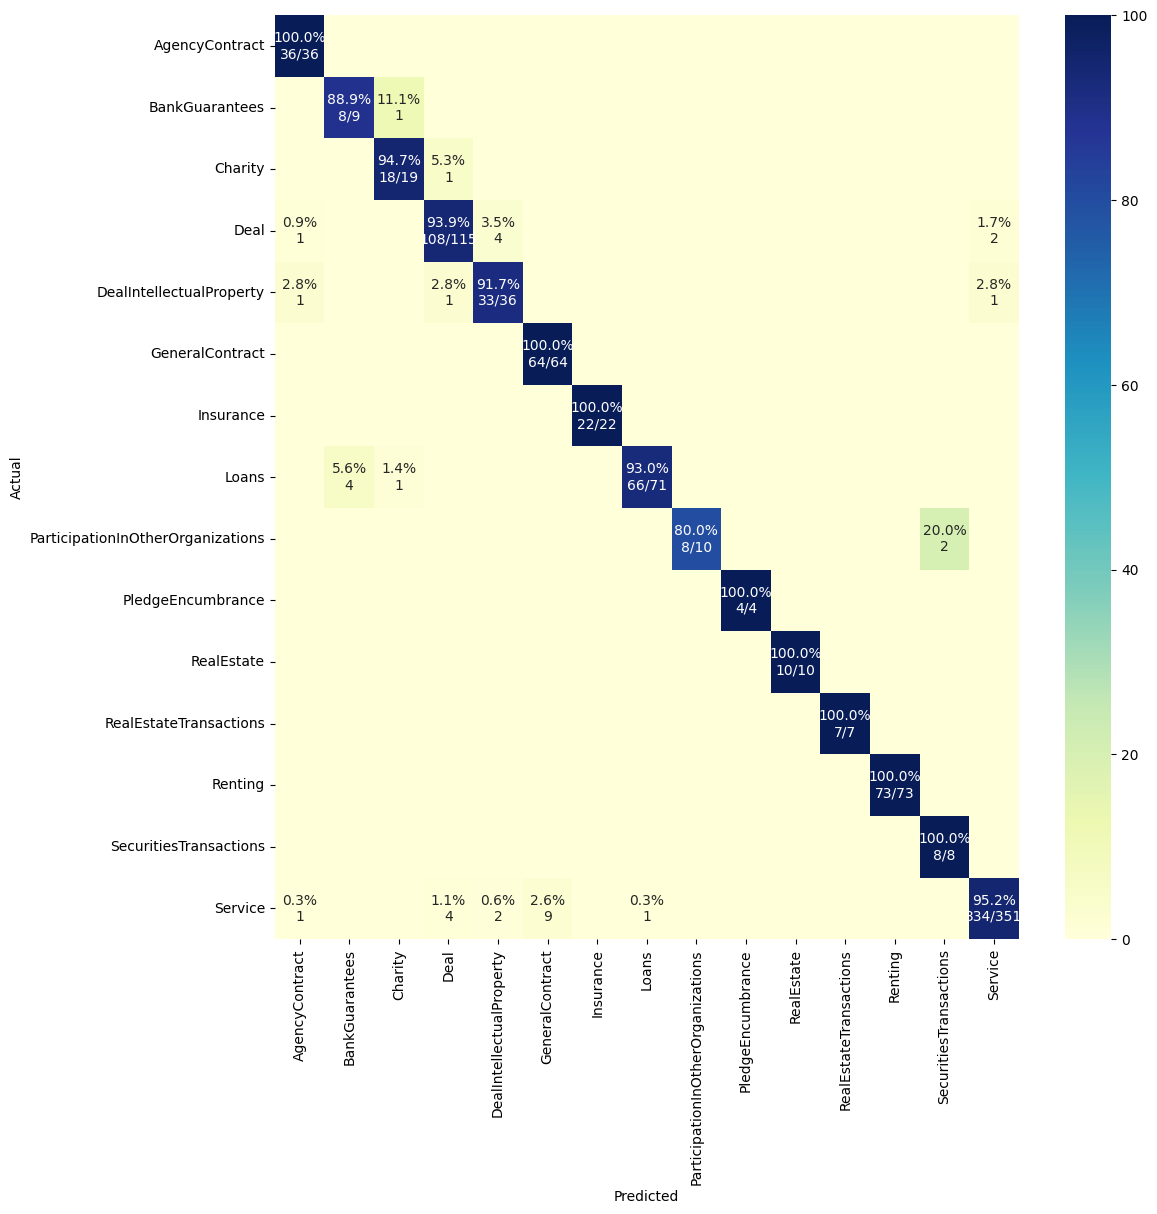

In [58]:
def make_report(umodel, subj_df):
  plot_cm(subj_df.subject_expected.values, subj_df.subject_predicted.values, figsize=(12, 12))
  
  img_path = umtm.reports_dir / f'subjects-confusion-matrix-{umodel.name}.png'
  plt.savefig(img_path, bbox_inches='tight')
  mlflow.log_artifact(img_path)

  report = classification_report(subj_df.subject_expected, subj_df.subject_predicted, digits=3)
  print(umodel.name)
  print(report)

  fn=umtm.reports_dir / f'subjects-classification_report-{umodel.name}.txt'
  with open(fn, "w") as text_file:
    text_file.write(report)
    mlflow.log_artifact(fn)


# subj_df = subj_df[['predicted_subj', 'expected_subj']].copy() #ev[~pd.isna(ev['predicted_subj'])]
make_report(umodel, subj_df)

### f1, subjects
- accuracy                                                   0.953       832
-                         macro avg      0.871     0.893     0.879       832
-                      weighted avg      0.959     0.953     0.955       832